#data cleansing

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
tr = pd.read_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_train.csv')
te = pd.read_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_test.csv')
df = pd.concat([tr,te])

In [3]:
df = df.set_index('my_id')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고일시       74485 non-null  object 
 1   사고지역       74485 non-null  object 
 2   사망자수       74485 non-null  int64  
 3   중상자수       74485 non-null  int64  
 4   경상자수       74485 non-null  int64  
 5   부상신고자수     74485 non-null  int64  
 6   사고유형       74485 non-null  object 
 7   법규위반       74485 non-null  object 
 8   노면상태       74485 non-null  object 
 9   기상상태       73575 non-null  object 
 10  도로형태       74485 non-null  object 
 11  가해운전자차종    72734 non-null  object 
 12  가해운전자성별    72738 non-null  object 
 13  가해운전자연령    72727 non-null  float64
 14  가해운전자상해정도  70172 non-null  object 
 15  피해운전자차종    72225 non-null  object 
 16  피해운전자성별    72225 non-null  object 
 17  피해운전자연령    72049 non-null  float64
 18  피해운전자상해정도  72225 non-null  object 
 19  음주운전       59589 non-null  float64
dtypes: 

결측치

In [5]:
df.isnull().sum()

사고일시             0
사고지역             0
사망자수             0
중상자수             0
경상자수             0
부상신고자수           0
사고유형             0
법규위반             0
노면상태             0
기상상태           910
도로형태             0
가해운전자차종       1751
가해운전자성별       1747
가해운전자연령       1758
가해운전자상해정도     4313
피해운전자차종       2260
피해운전자성별       2260
피해운전자연령       2436
피해운전자상해정도     2260
음주운전         14896
dtype: int64

결측치 처리

In [6]:
df['기상상태'] = df['기상상태'].fillna('OTHERS')
df['가해운전자차종'] = df['가해운전자차종'].fillna('OTHERS')
df['가해운전자성별'] = df['가해운전자성별'].fillna('OTHERS')
df['가해운전자상해정도'] = df['가해운전자상해정도'].fillna('OTHERS')
df['피해운전자차종'] = df['피해운전자차종'].fillna('OTHERS')
df['피해운전자성별'] = df['피해운전자성별'].fillna('OTHERS')
df['피해운전자상해정도'] = df['피해운전자상해정도'].fillna('OTHERS')
df['피해운전자연령'] = df['피해운전자연령'].fillna(df['피해운전자연령'].mean())
df['가해운전자연령'] = df['가해운전자연령'].fillna(df['가해운전자연령'].mean())

In [7]:
df.isnull().sum()

사고일시             0
사고지역             0
사망자수             0
중상자수             0
경상자수             0
부상신고자수           0
사고유형             0
법규위반             0
노면상태             0
기상상태             0
도로형태             0
가해운전자차종          0
가해운전자성별          0
가해운전자연령          0
가해운전자상해정도        0
피해운전자차종          0
피해운전자성별          0
피해운전자연령          0
피해운전자상해정도        0
음주운전         14896
dtype: int64

In [8]:
df['사고일시'] = pd.to_datetime(df['사고일시'], format="%Y년 %m월 %d일 %H시", errors='coerce')
df.insert(0,'사고년', df['사고일시'].dt.year)
df.insert(1,'사고월', df['사고일시'].dt.month)
df.insert(2,'사고일', df['사고일시'].dt.day)
df.insert(3,'사고시각', df['사고일시'].dt.hour)
df.insert(4,'사고요일', df['사고일시'].dt.weekday)
df.insert(5,'사고분기', df['사고일시'].dt.quarter)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고년        74485 non-null  int64         
 1   사고월        74485 non-null  int64         
 2   사고일        74485 non-null  int64         
 3   사고시각       74485 non-null  int64         
 4   사고요일       74485 non-null  int64         
 5   사고분기       74485 non-null  int64         
 6   사고일시       74485 non-null  datetime64[ns]
 7   사고지역       74485 non-null  object        
 8   사망자수       74485 non-null  int64         
 9   중상자수       74485 non-null  int64         
 10  경상자수       74485 non-null  int64         
 11  부상신고자수     74485 non-null  int64         
 12  사고유형       74485 non-null  object        
 13  법규위반       74485 non-null  object        
 14  노면상태       74485 non-null  object        
 15  기상상태       74485 non-null  object        
 16  도로형태       74485 non-null  object    

In [10]:
df.head()

,사고년,사고월,사고일,사고시각,사고요일,사고분기,사고일시,사고지역,사망자수,중상자수,...,도로형태,가해운전자차종,가해운전자성별,가해운전자연령,가해운전자상해정도,피해운전자차종,피해운전자성별,피해운전자연령,피해운전자상해정도,음주운전
my_id,,,,,,,,,,,,,,,,,,,,,
A000002,2020,4,16,5,3,2,2020-04-16 05:00:00,영등포구 여의도동,0,1,...,단일로 - 기타,승용,남,59.0,상해없음,보행자,남,71.0,중상,0.0
A000003,2020,3,3,22,1,1,2020-03-03 22:00:00,성북구 동소문동3가,0,0,...,단일로 - 기타,승용,남,66.0,상해없음,승용,남,40.0,경상,0.0
A000004,2019,5,17,18,4,2,2019-05-17 18:00:00,구로구 가리봉동,0,0,...,교차로 - 교차로안,승용,남,42.0,상해없음,개인형이동수단(PM),남,63.0,경상,0.0
A000005,2019,11,18,7,0,4,2019-11-18 07:00:00,구로구 오류동,0,1,...,교차로 - 교차로안,승용,남,57.0,상해없음,승용,여,57.0,중상,0.0
A000006,2019,5,21,14,1,2,2019-05-21 14:00:00,마포구 합정동,0,0,...,교차로 - 교차로부근,화물,남,52.0,상해없음,승용,남,38.0,경상,0.0


In [11]:
non_col = [0,1,2,3,4]
df['사고평일'] = df.사고요일.isin(non_col).astype('int')
non_col = [5,6]
df['사고주말'] = df.사고요일.isin(non_col).astype('int')
non_col = [5,6,0]
df['사고토일월'] = df.사고요일.isin(non_col).astype('int')

non_col = [0,1,2]
df['사고시각_0_2'] = df.사고시각.isin(non_col).astype('int')
non_col = [3,4,5]
df['사고시각_3_5'] = df.사고시각.isin(non_col).astype('int')
non_col = [6,7,8]
df['사고시각_6_8'] = df.사고시각.isin(non_col).astype('int')
non_col = [9,10,11]
df['사고시각_9_11'] = df.사고시각.isin(non_col).astype('int')
non_col = [12,13,14]
df['사고시각_12_14'] = df.사고시각.isin(non_col).astype('int')
non_col = [15,16,17]
df['사고시각_15_17'] = df.사고시각.isin(non_col).astype('int')
non_col = [18,19,20]
df['사고시각_18_20'] = df.사고시각.isin(non_col).astype('int')
non_col = [21,22,23]
df['사고시각_21_23'] = df.사고시각.isin(non_col).astype('int')

reference_date = pd.Timestamp('2023-04-23')
df['사고경과시간'] = (df['사고일시'] - reference_date).dt.days

def time_period(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['사고시간대유형'] = df['사고시각'].apply(time_period)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고년         74485 non-null  int64         
 1   사고월         74485 non-null  int64         
 2   사고일         74485 non-null  int64         
 3   사고시각        74485 non-null  int64         
 4   사고요일        74485 non-null  int64         
 5   사고분기        74485 non-null  int64         
 6   사고일시        74485 non-null  datetime64[ns]
 7   사고지역        74485 non-null  object        
 8   사망자수        74485 non-null  int64         
 9   중상자수        74485 non-null  int64         
 10  경상자수        74485 non-null  int64         
 11  부상신고자수      74485 non-null  int64         
 12  사고유형        74485 non-null  object        
 13  법규위반        74485 non-null  object        
 14  노면상태        74485 non-null  object        
 15  기상상태        74485 non-null  object        
 16  도로형태        74485 n

In [12]:
df[['사고년', '사고월', '사고일', '사고시각', '사고요일', '사고분기', '사고경과시간', '사고시간대유형']].head()

,사고년,사고월,사고일,사고시각,사고요일,사고분기,사고경과시간,사고시간대유형
my_id,,,,,,,,
A000002,2020,4,16,5,3,2,-1102,morning
A000003,2020,3,3,22,1,1,-1146,night
A000004,2019,5,17,18,4,2,-1437,evening
A000005,2019,11,18,7,0,4,-1252,morning
A000006,2019,5,21,14,1,2,-1433,afternoon


In [13]:
df['사고경과시간'] = (df['사고경과시간'] - df['사고경과시간'].mean())/df['사고경과시간'].std()

In [14]:
# from sklearn.preprocessing import LabelEncoder
# day_encoder = LabelEncoder()
# df['사고년'] = day_encoder.fit_transform(df['사고월'])
# df['사고월'] = day_encoder.fit_transform(df['사고월'])
# df['사고일'] = day_encoder.fit_transform(df['사고일'])
# df['사고시각'] = day_encoder.fit_transform(df['사고일시'])
# df['사고요일'] = day_encoder.fit_transform(df['사고요일'])
# df['사고분기'] = day_encoder.fit_transform(df['사고분기'])
# df['사고경과시간'] = day_encoder.fit_transform(df['사고경과시간'])

In [15]:
df[['사고년', '사고월', '사고일', '사고시각', '사고요일', '사고분기', '사고경과시간']].head()

,사고년,사고월,사고일,사고시각,사고요일,사고분기,사고경과시간
my_id,,,,,,,
A000002,2020,4,16,5,3,2,0.541357
A000003,2020,3,3,22,1,1,0.329544
A000004,2019,5,17,18,4,2,-1.071310
A000005,2019,11,18,7,0,4,-0.180733
A000006,2019,5,21,14,1,2,-1.052054


In [16]:
df.select_dtypes('object').nunique()

사고지역         465
사고유형          17
법규위반          11
노면상태          11
기상상태           6
도로형태          11
가해운전자차종       12
가해운전자성별        3
가해운전자상해정도      6
피해운전자차종       14
피해운전자성별        4
피해운전자상해정도      7
사고시간대유형        4
dtype: int64

###범주형 : 사고지역

In [17]:
df['사고지역']

my_id
A000002     영등포구 여의도동
A000003    성북구 동소문동3가
A000004      구로구 가리봉동
A000005       구로구 오류동
A000006       마포구 합정동
              ...    
A043049       중랑구 망우동
A047882       강동구 천호동
A057160       용산구 한남동
A051261       중랑구 신내동
A020850     성동구 성수동1가
Name: 사고지역, Length: 74485, dtype: object

In [18]:
df['사고지역_구'] = df['사고지역'].str.split().str[0]
df['사고지역_동'] = df['사고지역'].str.split().str[1]

In [19]:
df[['사고지역_구', '사고지역_동']].head()

,사고지역_구,사고지역_동
my_id,,
A000002,영등포구,여의도동
A000003,성북구,동소문동3가
A000004,구로구,가리봉동
A000005,구로구,오류동
A000006,마포구,합정동


###범주형 : 사고유형

In [20]:
df['사고유형']

my_id
A000002    차대사람 - 횡단중
A000003      차대차 - 추돌
A000004    차대차 - 측면충돌
A000005    차대차 - 측면충돌
A000006    차대차 - 측면충돌
              ...    
A043049    차대사람 - 횡단중
A047882    차대차 - 측면충돌
A057160      차대차 - 추돌
A051261    차대사람 - 횡단중
A020850      차대차 - 기타
Name: 사고유형, Length: 74485, dtype: object

In [21]:
df.insert(10, '사고유형_대범주', df['사고유형'].str.split(' - ').str[0])
df.insert(11, '사고유형_소범주', df['사고유형'].str.split(' - ').str[1])

In [22]:
df[['사고유형_대범주', '사고유형_소범주']].head()

,사고유형_대범주,사고유형_소범주
my_id,,
A000002,차대사람,횡단중
A000003,차대차,추돌
A000004,차대차,측면충돌
A000005,차대차,측면충돌
A000006,차대차,측면충돌


###범주형 : **도로형태**

In [23]:
df['도로형태']

my_id
A000002       단일로 - 기타
A000003       단일로 - 기타
A000004     교차로 - 교차로안
A000005     교차로 - 교차로안
A000006    교차로 - 교차로부근
              ...     
A043049    교차로 - 교차로부근
A047882       단일로 - 기타
A057160    교차로 - 교차로부근
A051261       단일로 - 기타
A020850       단일로 - 기타
Name: 도로형태, Length: 74485, dtype: object

In [24]:
df.insert(15, '도로형태_대범주', df['도로형태'].str.split(' - ').str[0])
df.insert(16, '도로형태_소범주', df['도로형태'].str.split(' - ').str[1])

In [25]:
df[['도로형태_대범주', '도로형태_소범주']].head()

,도로형태_대범주,도로형태_소범주
my_id,,
A000002,단일로,기타
A000003,단일로,기타
A000004,교차로,교차로안
A000005,교차로,교차로안
A000006,교차로,교차로부근


In [26]:
my_dict = {'사고유형':'사고유형x소범주',
           '도로형태':'도로형태x소범주'}
df = df.rename(columns=my_dict)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고년         74485 non-null  int64         
 1   사고월         74485 non-null  int64         
 2   사고일         74485 non-null  int64         
 3   사고시각        74485 non-null  int64         
 4   사고요일        74485 non-null  int64         
 5   사고분기        74485 non-null  int64         
 6   사고일시        74485 non-null  datetime64[ns]
 7   사고지역        74485 non-null  object        
 8   사망자수        74485 non-null  int64         
 9   중상자수        74485 non-null  int64         
 10  사고유형_대범주    74485 non-null  object        
 11  사고유형_소범주    74485 non-null  object        
 12  경상자수        74485 non-null  int64         
 13  부상신고자수      74485 non-null  int64         
 14  사고유형x소범주    74485 non-null  object        
 15  도로형태_대범주    74485 non-null  object        
 16  도로형태_소범주    74485 n

In [27]:
df[['도로형태_대범주', '도로형태_소범주', '도로형태x소범주']].head()

,도로형태_대범주,도로형태_소범주,도로형태x소범주
my_id,,,
A000002,단일로,기타,단일로 - 기타
A000003,단일로,기타,단일로 - 기타
A000004,교차로,교차로안,교차로 - 교차로안
A000005,교차로,교차로안,교차로 - 교차로안
A000006,교차로,교차로부근,교차로 - 교차로부근


In [28]:
df.to_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')

#Data processing

In [29]:
!apt install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [30]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

### <span style="color:#004f9f"> 0. Importing Data </span>

In [32]:
df = pd.read_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')
tr = df[~df['음주운전'].isnull()]
te = df[df['음주운전'].isnull()]
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고년         74485 non-null  int64         
 1   사고월         74485 non-null  int64         
 2   사고일         74485 non-null  int64         
 3   사고시각        74485 non-null  int64         
 4   사고요일        74485 non-null  int64         
 5   사고분기        74485 non-null  int64         
 6   사고일시        74485 non-null  datetime64[ns]
 7   사고지역        74485 non-null  object        
 8   사망자수        74485 non-null  int64         
 9   중상자수        74485 non-null  int64         
 10  사고유형_대범주    74485 non-null  object        
 11  사고유형_소범주    74485 non-null  object        
 12  경상자수        74485 non-null  int64         
 13  부상신고자수      74485 non-null  int64         
 14  사고유형x소범주    74485 non-null  object        
 15  도로형태_대범주    74485 non-null  object        
 16  도로형태_소범주    74485 n

## <span style="color:#004f9f"> 1. Basic Data Analysis </span>

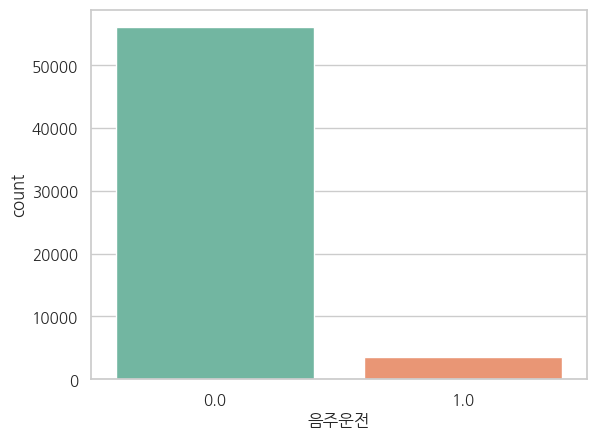

In [33]:
sns.countplot(x='음주운전', data=tr);

In [34]:
tr.음주운전.value_counts(normalize=True)

0.0    0.940694
1.0    0.059306
Name: 음주운전, dtype: float64

### <span style="color:#004f9f"> 1.1. 단일변수 시각화 </span>

In [35]:
df.select_dtypes('object').nunique()

사고지역         465
사고유형_대범주       3
사고유형_소범주      13
사고유형x소범주      17
도로형태_대범주       5
도로형태_소범주      10
법규위반          11
노면상태          11
기상상태           6
도로형태x소범주      11
가해운전자차종       12
가해운전자성별        3
가해운전자상해정도      6
피해운전자차종       14
피해운전자성별        4
피해운전자상해정도      7
사고시간대유형        4
사고지역_구        26
사고지역_동       463
dtype: int64

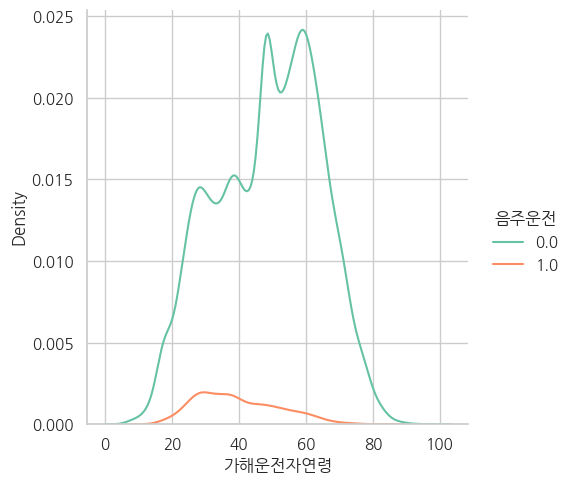

In [36]:
sns.displot(x='가해운전자연령', hue='음주운전', data=tr, kind='kde');

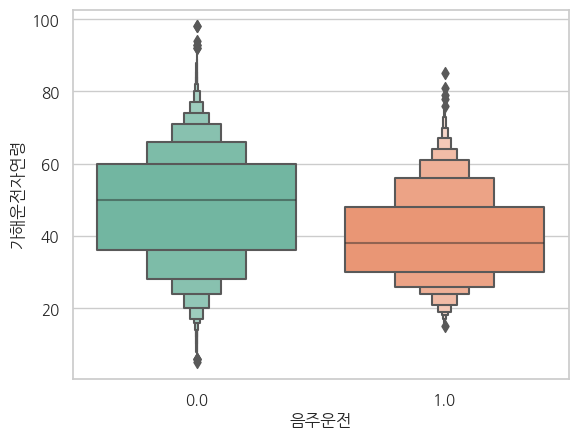

In [37]:
sns.boxenplot(x='음주운전', y='가해운전자연령', data=tr);

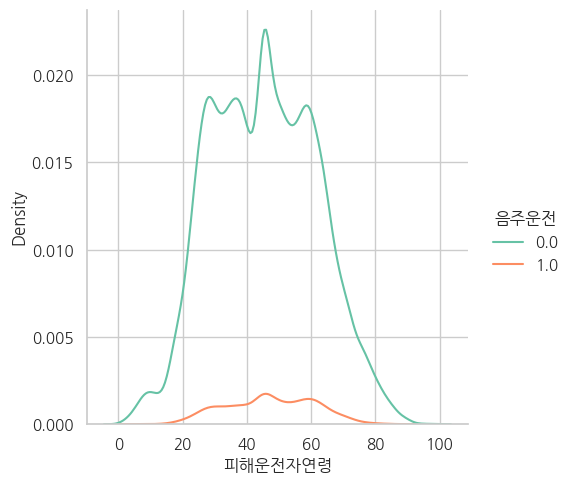

In [38]:
sns.displot(x='피해운전자연령', hue='음주운전', data=tr, kind='kde');

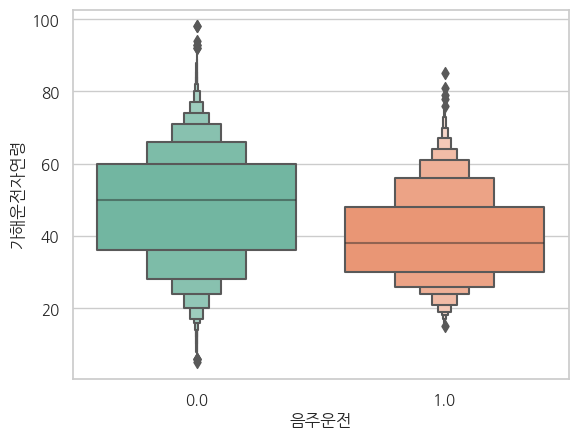

In [39]:
sns.boxenplot(x='음주운전', y='가해운전자연령', data=tr);

In [40]:
df['가해운전자연령_20대이하'] = ((df['가해운전자연령']).astype('int') < 20).astype('int')
df['가해운전자연령_20_30'] = (df['가해운전자연령'].between(20, 30)).astype('int')
df['가해운전자연령_30_40'] = (df['가해운전자연령'].between(30, 40)).astype('int')
df['가해운전자연령_40_50'] = (df['가해운전자연령'].between(40, 50)).astype('int')
df['가해운전자연령_50_60'] = (df['가해운전자연령'].between(50, 60)).astype('int')
df['가해운전자연령_60_70'] = (df['가해운전자연령'].between(60, 70)).astype('int')
df['가해운전자연령_70_80'] = (df['가해운전자연령'].between(70, 78)).astype('int')
df['가해운전자연령_80이상'] = ((df['가해운전자연령']).astype('int') > 80).astype('int')

df['피해운전자연령_20대이하'] = ((df['피해운전자연령']).astype('int') < 20).astype('int')
df['피해운전자연령_20_30'] = (df['피해운전자연령'].between(20, 30)).astype('int')
df['피해운전자연령_30_40'] = (df['피해운전자연령'].between(30, 40)).astype('int')
df['피해운전자연령_40_50'] = (df['피해운전자연령'].between(40, 50)).astype('int')
df['피해운전자연령_50_60'] = (df['피해운전자연령'].between(50, 60)).astype('int')
df['피해운전자연령_60_70'] = (df['피해운전자연령'].between(60, 70)).astype('int')
df['피해운전자연령_70_80'] = (df['피해운전자연령'].between(70, 80)).astype('int')
df['피해운전자연령_80이상'] = ((df['피해운전자연령']).astype('int') > 80).astype('int')

In [41]:
df[['가해운전자연령', '가해운전자연령_20대이하', '가해운전자연령_30_40']].head(20)

,가해운전자연령,가해운전자연령_20대이하,가해운전자연령_30_40
my_id,,,
A000002,59.0,0,0
A000003,66.0,0,0
A000004,42.0,0,0
A000005,57.0,0,0
A000006,52.0,0,0
A000007,62.0,0,0
A000008,60.0,0,0
A000009,37.0,0,1
A000010,30.0,0,1


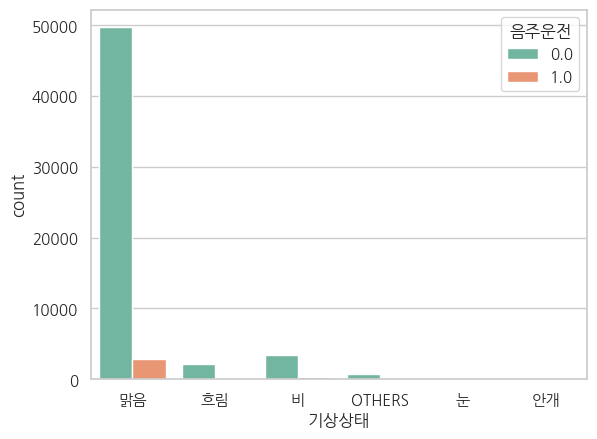

In [42]:
sns.countplot(x='기상상태', hue='음주운전', data=tr);

In [43]:
df['기상상태_맑음'] = (df['기상상태'] == '맑음').astype('int')
df['기상상태_흐림'] = (df['기상상태'] == '흐림').astype('int')
df['기상상태_비'] = (df['기상상태'] == '비').astype('int')

non_col = ['OTHERS', '눈', '안개']
df['기상상태_others'] = df['기상상태'].isin(non_col).astype('int')

In [44]:
df[['기상상태', '기상상태_맑음', '기상상태_흐림', '기상상태_비', '기상상태_others']].head(20)

,기상상태,기상상태_맑음,기상상태_흐림,기상상태_비,기상상태_others
my_id,,,,,
A000002,맑음,1,0,0,0
A000003,맑음,1,0,0,0
A000004,맑음,1,0,0,0
A000005,흐림,0,1,0,0
A000006,맑음,1,0,0,0
A000007,맑음,1,0,0,0
A000008,맑음,1,0,0,0
A000009,맑음,1,0,0,0
A000010,맑음,1,0,0,0


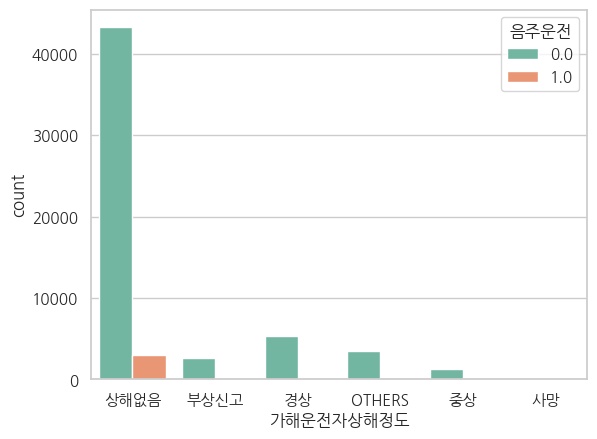

In [45]:
sns.countplot(x='가해운전자상해정도', hue='음주운전', data=tr);

In [46]:
non_col = ['경상', '중상', '부상신고', '사망']
df['가해운전자상해있음'] = df['가해운전자상해정도'].isin(non_col).astype('int')
df['가해운전자상해없음'] = df['가해운전자상해정도'].isin(['상해없음']).astype('int')

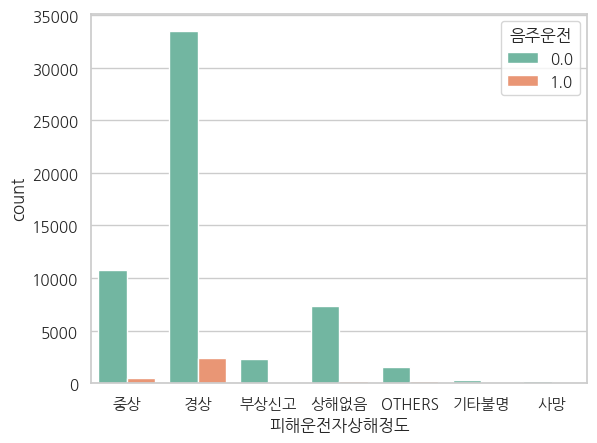

In [47]:
sns.countplot(x='피해운전자상해정도', hue='음주운전', data=tr);

In [48]:
non_col = ['OTHERS', '기타불명']
df['피해운전자상해정도_OTHERS'] = df['피해운전자상해정도'].isin(non_col).astype('int')
df['피해운전자상해정도_중상'] = (df['피해운전자상해정도'] == '중상').astype('int')
df['피해운전자상해정도_경상'] = (df['피해운전자상해정도'] == '경상').astype('int')
df['피해운전자상해정도_부상신고'] = (df['피해운전자상해정도'] == '부상신고').astype('int')
df['피해운전자상해정도_상해없음'] = (df['피해운전자상해정도'] == '상해없음').astype('int')
df['피해운전자상해정도_사망'] = (df['피해운전자상해정도'] == '사망').astype('int')

non_col = ['경상', '중상', '부상신고', '사망']
df['피해운전자상해있음'] = df['피해운전자상해정도'].isin(non_col).astype('int')
df['피해운전자상해없음'] = df['피해운전자상해정도'].isin(['상해없음']).astype('int')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   사고년               74485 non-null  int64         
 1   사고월               74485 non-null  int64         
 2   사고일               74485 non-null  int64         
 3   사고시각              74485 non-null  int64         
 4   사고요일              74485 non-null  int64         
 5   사고분기              74485 non-null  int64         
 6   사고일시              74485 non-null  datetime64[ns]
 7   사고지역              74485 non-null  object        
 8   사망자수              74485 non-null  int64         
 9   중상자수              74485 non-null  int64         
 10  사고유형_대범주          74485 non-null  object        
 11  사고유형_소범주          74485 non-null  object        
 12  경상자수              74485 non-null  int64         
 13  부상신고자수            74485 non-null  int64         
 14  사고유형x소범주          7

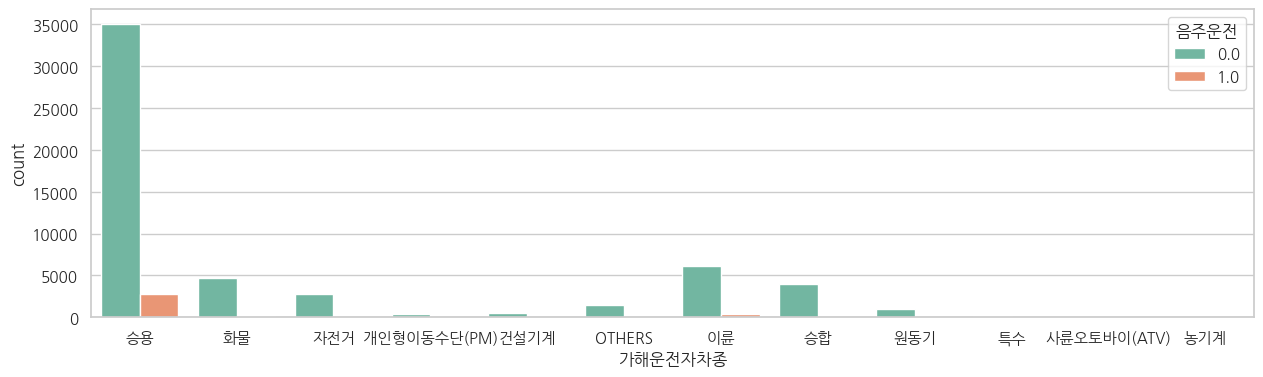

In [50]:
plt.figure(figsize=(15,4))
sns.countplot(x='가해운전자차종', hue='음주운전', data=tr);

In [51]:
non_col = ['화물', '자전거', '개인형이동수단(PM)', '건설기계', 'OTHERS', '이륜', '승합', '원동기', '특수', '사륜오토바이(ATV)', '농기계']
df['가해운전자차종_승용x'] = df['가해운전자차종'].isin(non_col).astype('int')

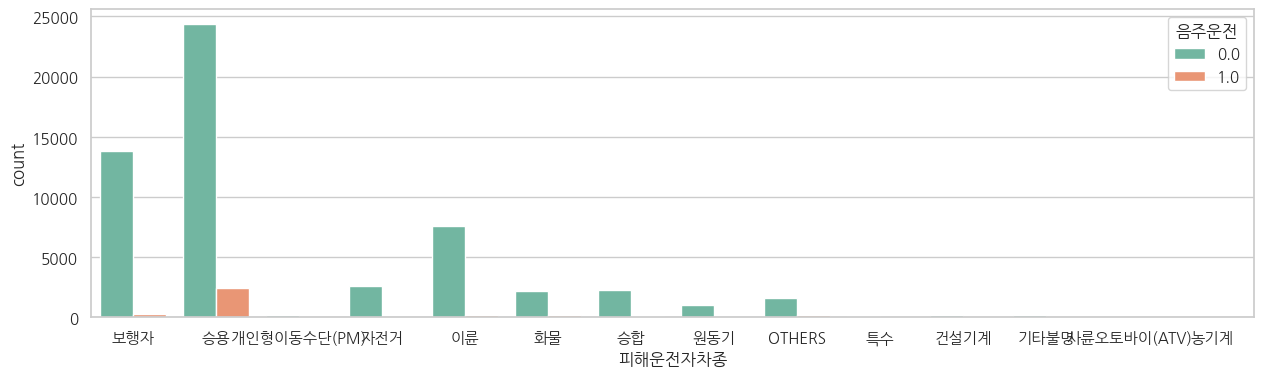

In [52]:
plt.figure(figsize=(15,4))
sns.countplot(x='피해운전자차종', hue='음주운전', data=tr);

In [53]:
non_col = ['개인형이동수단(PM)', '화물', '자전거', '이륜', '승합', '원동기', 'OTHERS', '특수', '건설기계', '기타불명', '사륜오토바이(ATV)', '농기계']
df['피해운전자차종_승용x'] = df['피해운전자차종'].isin(non_col).astype('int')

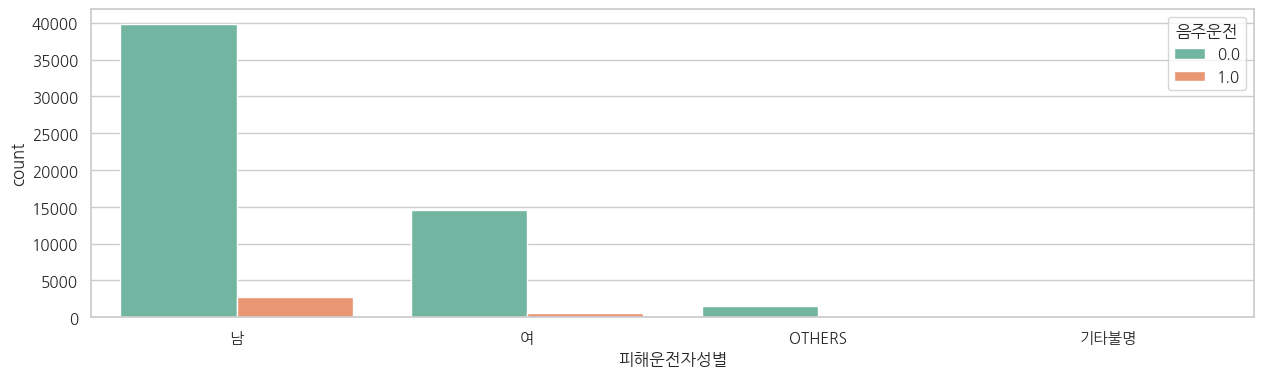

In [54]:
plt.figure(figsize=(15,4))
sns.countplot(x='피해운전자성별', hue='음주운전', data=tr);

In [55]:
non_col = ['OTHERS', '기타불명']
df['피해운전자성별_OHTERS'] = df['피해운전자성별'].isin(non_col).astype('int')
df['피해운전자성별_남'] = (df['피해운전자성별'] == '남').astype('int')
df['피해운전자성별_녀'] = (df['피해운전자성별'] == '녀').astype('int')

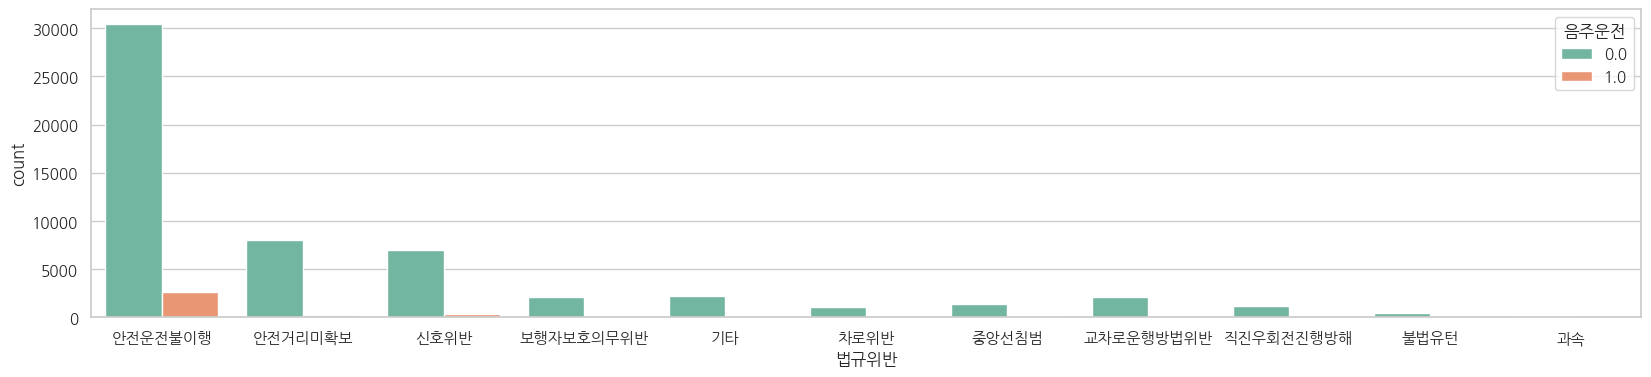

In [56]:
plt.figure(figsize=(20,4))
sns.countplot(x='법규위반', hue='음주운전', data=tr);

In [57]:
non_col = ['안전거리미확보', '신호위반', '보행자보호의무위반', '기타', '차로위반', '중앙선침범', '교차로운행방법위반', '직진우회전진행방해', '불법유턴', '과속']
df['법규위반_안전운전X'] = df['법규위반'].isin(non_col).astype('int')

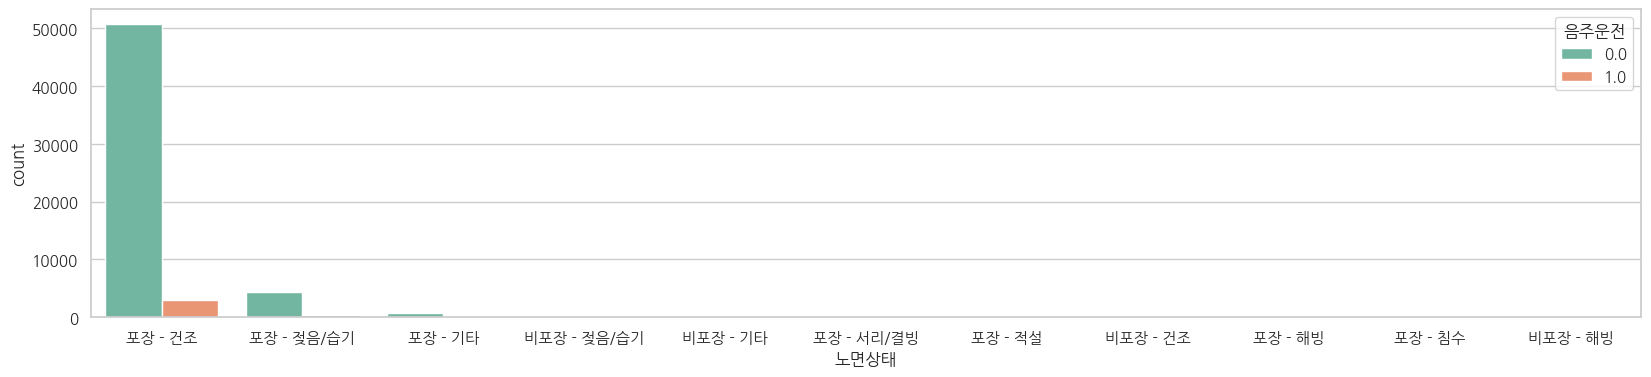

In [58]:
plt.figure(figsize=(20,4))
sns.countplot(x='노면상태', hue='음주운전', data=tr);

In [59]:
df.insert(15, '노면상태_대범주', df['노면상태'].str.split(' - ').str[0])
df.insert(15, '노면상태_소범주', df['노면상태'].str.split(' - ').str[1])

In [60]:
df[['노면상태_대범주', '노면상태_소범주']].head()

,노면상태_대범주,노면상태_소범주
my_id,,
A000002,포장,건조
A000003,포장,건조
A000004,포장,건조
A000005,포장,젖음/습기
A000006,포장,건조


In [61]:
drop_col = ['사고일시', '기상상태', '피해운전자상해정도', '피해운전자성별', '사고지역', '사고지역_동']
df = df.drop(columns=drop_col)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   사고년               74485 non-null  int64  
 1   사고월               74485 non-null  int64  
 2   사고일               74485 non-null  int64  
 3   사고시각              74485 non-null  int64  
 4   사고요일              74485 non-null  int64  
 5   사고분기              74485 non-null  int64  
 6   사망자수              74485 non-null  int64  
 7   중상자수              74485 non-null  int64  
 8   사고유형_대범주          74485 non-null  object 
 9   사고유형_소범주          74485 non-null  object 
 10  경상자수              74485 non-null  int64  
 11  부상신고자수            74485 non-null  int64  
 12  사고유형x소범주          74485 non-null  object 
 13  노면상태_소범주          74485 non-null  object 
 14  노면상태_대범주          74485 non-null  object 
 15  도로형태_대범주          74485 non-null  object 
 16  도로형태_소범주          74485 non-null  obj

In [62]:
df.select_dtypes('number').nunique()

사고년                2
사고월               12
사고일               31
사고시각              24
사고요일               7
                  ..
피해운전자차종_승용x        2
피해운전자성별_OHTERS     2
피해운전자성별_남          2
피해운전자성별_녀          1
법규위반_안전운전X         2
Length: 61, dtype: int64

In [63]:
df.select_dtypes('object').nunique()

사고유형_대범주      3
사고유형_소범주     13
사고유형x소범주     17
노면상태_소범주      7
노면상태_대범주      2
도로형태_대범주      5
도로형태_소범주     10
법규위반         11
노면상태         11
도로형태x소범주     11
가해운전자차종      12
가해운전자성별       3
가해운전자상해정도     6
피해운전자차종      14
사고시간대유형       4
사고지역_구       26
dtype: int64

In [64]:
df = pd.get_dummies(df, columns = ['사고유형_대범주',
                                    '사고유형_소범주',
                                    '사고유형x소범주',
                                    '노면상태_소범주',
                                    '노면상태_대범주',
                                    '도로형태_대범주',
                                    '도로형태_소범주',
                                    '법규위반',
                                    '노면상태',
                                    '도로형태x소범주',
                                    '가해운전자차종',
                                    '가해운전자성별',
                                    '가해운전자상해정도',
                                    '피해운전자차종',
                                    '사고시간대유형',
                                    '사고지역_구',
                                    ])


In [65]:
df = pd.get_dummies(df, columns = ['사고월', '사고시각', '사고요일', '사고분기'])

In [66]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 259 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    사고년                         74485 non-null  int64  
 1    사고일                         74485 non-null  int64  
 2    사망자수                        74485 non-null  int64  
 3    중상자수                        74485 non-null  int64  
 4    경상자수                        74485 non-null  int64  
 5    부상신고자수                      74485 non-null  int64  
 6    가해운전자연령                     74485 non-null  float64
 7    피해운전자연령                     74485 non-null  float64
 8    음주운전                        59589 non-null  float64
 9    사고평일                        74485 non-null  int64  
 10   사고주말                        74485 non-null  int64  
 11   사고토일월                       74485 non-null  int64  
 12   사고시각_0_2                    74485 non-null  int64  
 13   사고시각_3_5   

In [67]:
df.to_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')

### <span style="color:#004f9f"> 1.2. 다변수 시각화 </span>

In [68]:
# 다중 공선성 제거하기용으로 0.9이상이면 제거
#sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, fmt='0.2f', cmap='viridis');

In [69]:
#노란색이 결측치
#결측치는 지우는게 좋음 (dropna)
#sns.heatmap(df.isnull(), cbar=False, yticklabels=False, 
#            linecolor='white',cmap='viridis');

In [70]:
# 덴드로그램으로 비슷한거 묶거나 제거 (최종적으로 처리)
# 목표변수는 제거 하고 
#sns.clustermap(df.select_dtypes(['number']).corr(), annot=True, fmt='0.2f', cmap='viridis');

#FE_AUTOML

In [71]:
df = pd.read_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')
df = df[~df['음주운전'].isnull()]
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 59589 entries, A000002 to A074483
Data columns (total 259 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    사고년                         59589 non-null  int64  
 1    사고일                         59589 non-null  int64  
 2    사망자수                        59589 non-null  int64  
 3    중상자수                        59589 non-null  int64  
 4    경상자수                        59589 non-null  int64  
 5    부상신고자수                      59589 non-null  int64  
 6    가해운전자연령                     59589 non-null  float64
 7    피해운전자연령                     59589 non-null  float64
 8    음주운전                        59589 non-null  float64
 9    사고평일                        59589 non-null  int64  
 10   사고주말                        59589 non-null  int64  
 11   사고토일월                       59589 non-null  int64  
 12   사고시각_0_2                    59589 non-null  int64  
 13   사고시각_3_5   

In [72]:
cat_list = df.select_dtypes(['object']).columns.tolist()
num_list = df.select_dtypes(['number']).drop(columns='음주운전').columns.tolist()
cat_list

[]

In [73]:
num_list

['사고년',
 '사고일',
 '사망자수',
 '중상자수',
 '경상자수',
 '부상신고자수',
 '가해운전자연령',
 '피해운전자연령',
 '사고평일',
 '사고주말',
 '사고토일월',
 '사고시각_0_2',
 '사고시각_3_5',
 '사고시각_6_8',
 '사고시각_9_11',
 '사고시각_12_14',
 '사고시각_15_17',
 '사고시각_18_20',
 '사고시각_21_23',
 '사고경과시간',
 '가해운전자연령_20대이하',
 '가해운전자연령_20_30',
 '가해운전자연령_30_40',
 '가해운전자연령_40_50',
 '가해운전자연령_50_60',
 '가해운전자연령_60_70',
 '가해운전자연령_70_80',
 '가해운전자연령_80이상',
 '피해운전자연령_20대이하',
 '피해운전자연령_20_30',
 '피해운전자연령_30_40',
 '피해운전자연령_40_50',
 '피해운전자연령_50_60',
 '피해운전자연령_60_70',
 '피해운전자연령_70_80',
 '피해운전자연령_80이상',
 '기상상태_맑음',
 '기상상태_흐림',
 '기상상태_비',
 '기상상태_others',
 '가해운전자상해있음',
 '가해운전자상해없음',
 '피해운전자상해정도_OTHERS',
 '피해운전자상해정도_중상',
 '피해운전자상해정도_경상',
 '피해운전자상해정도_부상신고',
 '피해운전자상해정도_상해없음',
 '피해운전자상해정도_사망',
 '피해운전자상해있음',
 '피해운전자상해없음',
 '가해운전자차종_승용x',
 '피해운전자차종_승용x',
 '피해운전자성별_OHTERS',
 '피해운전자성별_남',
 '피해운전자성별_녀',
 '법규위반_안전운전X',
 '사고유형_대범주_차대사람',
 '사고유형_대범주_차대차',
 '사고유형_대범주_차량단독',
 '사고유형_소범주_공작물충돌',
 '사고유형_소범주_기타',
 '사고유형_소범주_길가장자리구역통행중',
 '사고유형_소범주_도로외이탈',
 '사고유형_소범주_보도통행중',
 '사고유형_소범주_전도전복',
 '사고유

In [74]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from pycaret import classification as cls
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [79]:
# 옵션 찾아보고 인자 추가하기
cls.setup(data=df, target='음주운전', train_size=0.7, session_id = 1234, 
          use_gpu=False, 
          verbose=True,     
          normalize = True,           # 데이터 정규화 여부
          transformation = True,      # 데이터 로그 변환 여부
          remove_multicollinearity = True, # 다중공선성 제거 여부
          multicollinearity_threshold = 0.9, # 다중공선성 제거를 위한 VIF 임계값
          feature_selection = True,  # 자동 특성 선택 사용 여부
          n_features_to_select = 0.8,  # 특성 선택을 위한 상관계수 임계값
          #fix_imbalance = True, #불균형 처리
          remove_outliers=True,
          pca=True,
          #polynomial_features=True
)

,Description,Value
0,Session id,1234
1,Target,음주운전
2,Target type,Binary
3,Original data shape,"(59589, 259)"
4,Transformed data shape,"(57503, 207)"
5,Transformed train set shape,"(39626, 207)"
6,Transformed test set shape,"(17877, 207)"
7,Numeric features,258
8,Preprocess,True
9,Imputation type,simple


In [80]:
from sklearn.metrics import average_precision_score
cls.add_metric('apc', 'APC', average_precision_score, target = 'pred_proba')

Name                                                               APC
Display Name                                                       APC
Score Function       <function average_precision_score at 0x7f9371f...
Scorer               make_scorer(average_precision_score, needs_pro...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: apc, dtype: object

In [81]:
# 모델도 알아서 골라줌
# n_select -> 스태킹, 느린데 해볼만함 (601 자료)
#my_models = cls.compare_models(n_select=3, sort='apc')
top_model = cls.compare_models(fold=4, n_select=2, sort='apc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
catboost,CatBoost Classifier,0.9463,0.8941,0.2126,0.6447,0.3195,0.2989,0.3498,0.4524,79.7300
lr,Logistic Regression,0.9466,0.8891,0.2603,0.6177,0.3660,0.3429,0.3783,0.4428,29.5075
lightgbm,Light Gradient Boosting Machine,0.9467,0.8875,0.2437,0.6298,0.3513,0.3291,0.3701,0.4427,8.1125
lda,Linear Discriminant Analysis,0.9408,0.8825,0.3832,0.5008,0.4340,0.4033,0.4074,0.4173,3.3075
xgboost,Extreme Gradient Boosting,0.9454,0.8758,0.2296,0.6058,0.3327,0.3102,0.3506,0.4118,106.8850
gbc,Gradient Boosting Classifier,0.9450,0.8820,0.2013,0.6111,0.3027,0.2816,0.3297,0.4088,153.8375
et,Extra Trees Classifier,0.9410,0.8581,0.0065,0.7486,0.0128,0.0118,0.0647,0.3834,8.2775
rf,Random Forest Classifier,0.9421,0.8550,0.0372,0.7290,0.0707,0.0653,0.1555,0.3783,46.0025
ada,Ada Boost Classifier,0.9426,0.8627,0.2203,0.5422,0.3126,0.2882,0.3208,0.3700,34.3050
knn,K Neighbors Classifier,0.9372,0.7644,0.1997,0.4369,0.2740,0.2459,0.2667,0.2297,9.8350


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
my_models = [cls.tune_model(m) for m in top_model]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:04:24
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
top_model = cls.stack_models(my_models, optimize='apc')
#top_model = cls.blend_models(my_models, optimize='apc')

In [ ]:
print(top_model)

In [ ]:
#cls.evaluate_model(top_model)

In [ ]:
final_model = cls.finalize_model(top_model)

In [ ]:
cls.save_model(final_model, 'automl_ver01')

In [ ]:
te = pd.read_pickle('/content/drive/Othercomputers/내 노트북/study/08_DS/data/acc_raw.pkl')
te = te[te['음주운전'].isnull()]
te = te.drop(columns='음주운전')

In [ ]:
pred = cls.predict_model(final_model, data=te, raw_score=True)
pred.head()

In [ ]:
pred = pred[['prediction_score_1']].reset_index()
pred.columns = ['my_id','prob']
pred.head()

In [ ]:
pred.to_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/first_submission.csv', index=False)

* 월요일 아침, 주말여부
* 사고월(연말)
* 시각(범주형으로 바꾸면 도움됨) - 음주운전 시간대
* threshold 0.28 정도가 좋음
* 스태킹 느린데 해볼만함 (compare_model) 601자료


* 피쳐엔지니어링 - 범주형 변수의 범주를 줄여야함
* 파이캐럿 - 파라미터 조절 잘하기
* 자료도있음